In [6]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sys.path.insert(1, '../src/')
pd.set_option("display.max_columns", 999)

import modelo_pressao_social as ps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


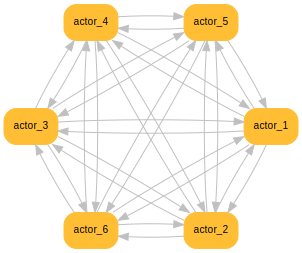

In [107]:
gr = ps.ModeloPressaoSocial(
    
        n_actors = 6,
        influence_mode = 'all',
        beta = 0,
        possible_opinions = [-1,1], 
        randomize_start_opinions= True

    )

gr.make_graph()

In [108]:
gr.initial_pressures

{'actor_1': 0,
 'actor_2': 0,
 'actor_3': 0,
 'actor_4': 0,
 'actor_5': 0,
 'actor_6': 0}

In [109]:
info = gr.run(100)

In [110]:
pr = pd.concat([info[n]['Un'] for n in info.keys()], axis = 1)
pr = pr.T
pr.head()

,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6
0,-1,-1,-1,-1,-1,0
1,0,0,0,0,0,0
2,-1,-1,-1,-1,-1,0
3,0,0,0,0,0,1
4,-1,-1,-1,-1,0,0


In [111]:
pd.Series([n['chosen_opinion'] for n in info.values()]).value_counts()

-1    58
 1    42
dtype: int64

In [112]:
pd.Series([n['chosen_actor'] for n in info.values()]).value_counts()

actor_3    22
actor_6    21
actor_1    16
actor_5    16
actor_2    14
actor_4    11
dtype: int64

In [115]:
pd.concat([n['P_O_given_A_U'] for n in info.values()], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
-1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


actor_1


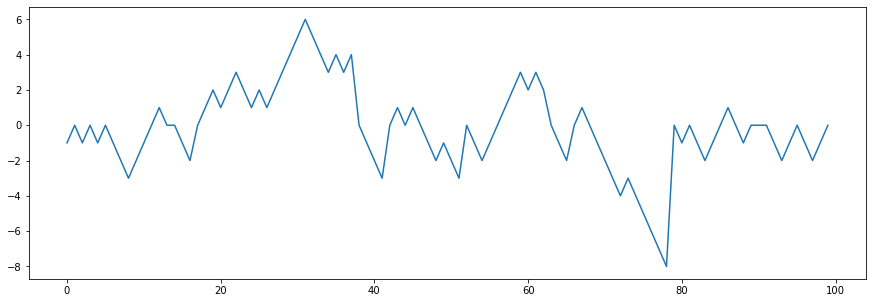

actor_2


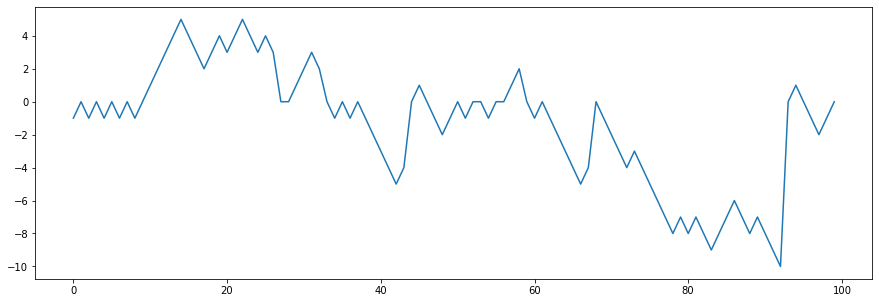

actor_3


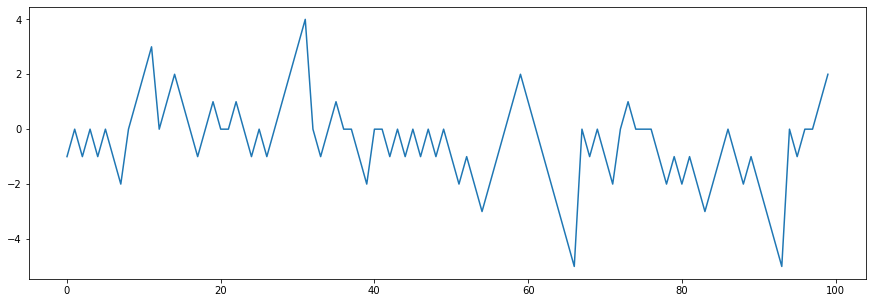

actor_4


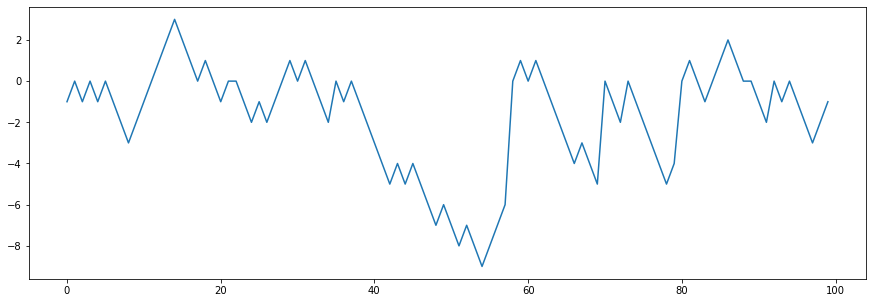

actor_5


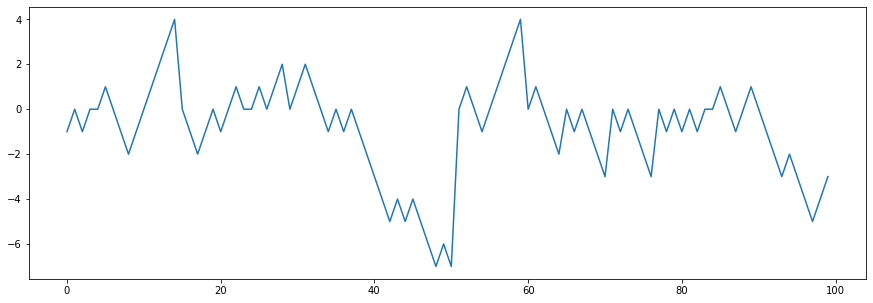

actor_6


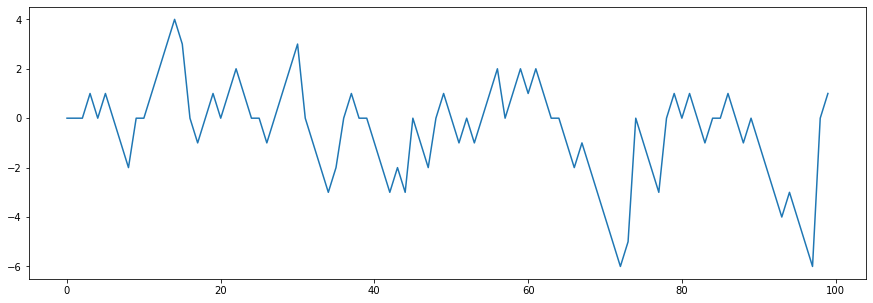

In [114]:
for actor in pr.columns:
    print(actor)
    pr[actor].plot(kind = 'line', figsize = (15,5))
    plt.show()